In [13]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [14]:
df= pd.read_csv(r"csv files\auto_mpg_cleaned.csv")
df.head()
X = df.drop('mpg', axis=1)
y = df[['mpg']]


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.25,random_state=42)


In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

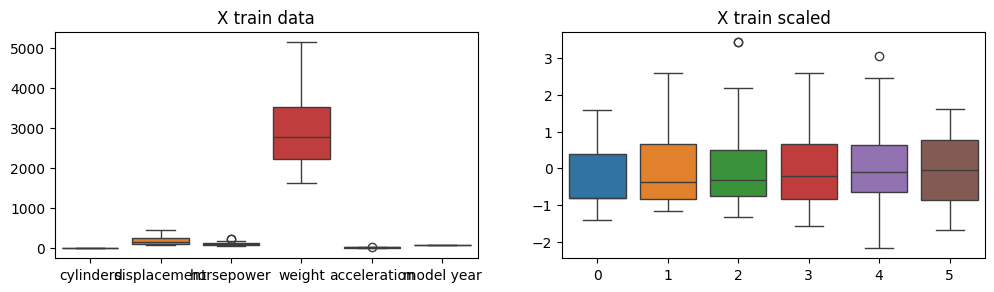

In [17]:
plt.figure(figsize=(12,10))
plt.subplot(3,2,1)
sns.boxplot(data=X_train)
plt.title('X train data')
plt.subplot(3,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X train scaled')
plt.show()

Mean Absolute error: 2.7688202081709097, & R Squared: 0.7812182648237629


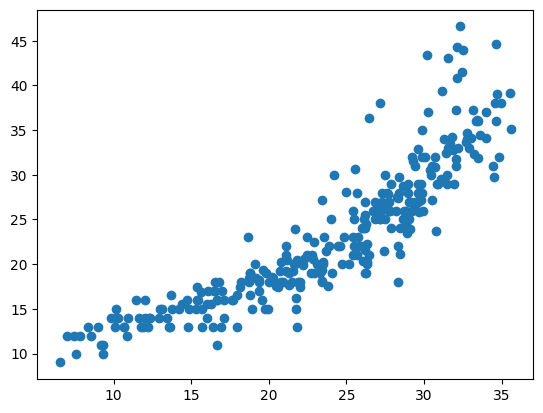

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

linreg = LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f"Mean Absolute error: {mae}, & R Squared: {r2}")
plt.scatter(y_pred,y_test)
plt.show()


Mean absolute Error: 2.846789226275824, R Squared: 0.7568634099560639


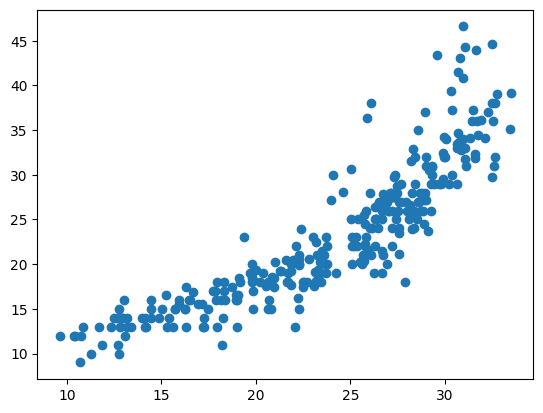

In [19]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f"Mean absolute Error: {mae}, R Squared: {r2}")
plt.scatter(y_pred,y_test)

Mae: 2.767267241977835, R2: 0.7805475805450163


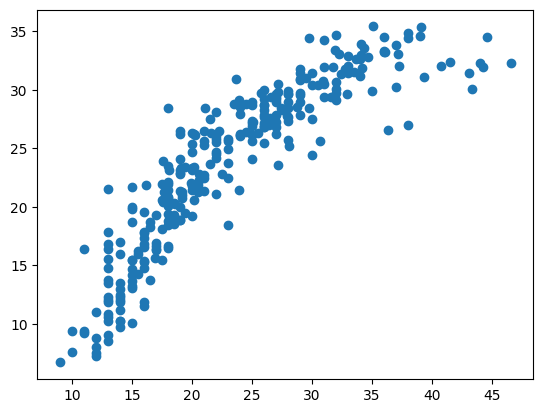

In [20]:
from sklearn.linear_model import Ridge
ridgereg = Ridge()
ridgereg.fit(X_train_scaled,y_train)
y_pred = ridgereg.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f"Mae: {mae}, R2: {r2}")
plt.scatter(y_test,y_pred)

Mean absolute error: 3.0213905052231467, and R squared: 0.7344217128558346


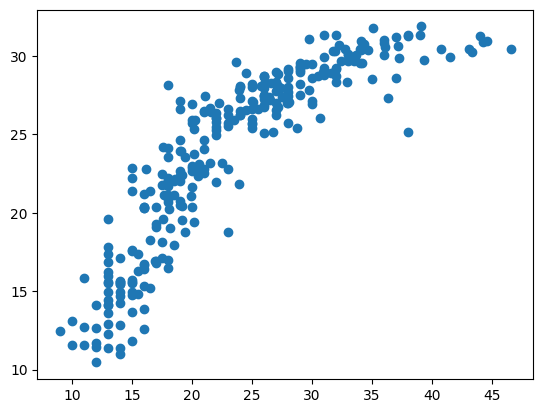

In [21]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, r2_score

elast = ElasticNet()
elast.fit(X_train_scaled,y_train)
y_pred = elast.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(f"Mean absolute error: {mae}, and R squared: {score}")
plt.scatter(y_test,y_pred)

Mean absolute error: 2.779148709587092, and R squared: 0.7738582494670738


[]

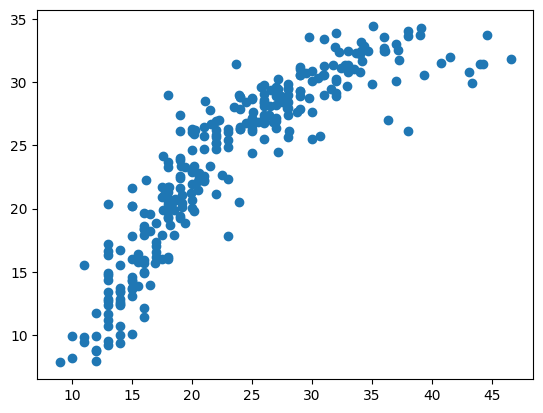

In [22]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred = ridgecv.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(f"Mean absolute error: {mae}, and R squared: {score}")
plt.scatter(y_test,y_pred)
plt.plot()

In [24]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridgereg,open('ridge.pkl','wb'))

In [26]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [29]:
df['cylinders'].unique()
df['model year'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])